<a href="https://colab.research.google.com/github/yamini542/AppliedAI_Assignments/blob/main/AppliedAi_ass1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessary libraries
!pip install pmdarima

import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from scipy.spatial.distance import cdist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 40.1 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


•	Timestamp (GMT): the date and time in GMT when the measurements were taken
•	Lifetouch Heart Rate: the heart rate (in beats per minute) recorded by the Lifetouch device
•	Lifetouch Respiration Rate: the respiration rate (in breaths per minute) recorded by the Lifetouch device
•	Oximeter SpO2: the oxygen saturation percentage recorded by the oximeter
•	Oximeter Pulse: the pulse rate (in beats per minute) recorded by the oximeter
•	The Oximeter SpO2 and Oximeter Pulse columns have 191 non-null entries, while the other columns have 226 non-null entries. The data types are object for the Timestamp (GMT) column, int64 for the Lifetouch Heart Rate and Lifetouch Respiration Rate columns, and float64 for the Oximeter SpO2 and Oximeter Pulse columns.



In [ ]:
!pip install --upgrade --q --no-cache-dir gdown
!gdown 1NQ2yc8L-XvMCML2-qoHuTNb5xvERF5mp
#loading the data set from the guthub link
df=pd.read_csv('PT_Train.csv')

Downloading...
From: https://drive.google.com/uc?id=1NQ2yc8L-XvMCML2-qoHuTNb5xvERF5mp
To: /content/PT_Train.csv
100% 7.17k/7.17k [00:00<00:00, 9.28MB/s]


In [ ]:
df.head(5)

,Timestamp (GMT),Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
0,17/08/2015 15:09,139,41,83.450262,126.335079
1,17/08/2015 15:10,144,40,92.000000,140.000000
2,17/08/2015 15:11,140,42,89.000000,144.000000
3,17/08/2015 15:12,138,45,93.000000,141.000000
4,17/08/2015 15:13,133,42,94.000000,134.000000


In [ ]:
df.describe()

,Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
count,226.000000,226.000000,191.000000,191.000000
mean,2315.615044,2219.216814,83.450262,126.335079
std,11351.588825,11370.093548,29.802974,46.348142
min,106.000000,34.000000,-1.000000,-1.000000
25%,136.000000,38.000000,92.000000,134.000000
50%,145.000000,46.000000,93.000000,139.000000
75%,156.000000,53.000000,95.000000,149.000000
max,61442.000000,61442.000000,98.000000,166.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Timestamp (GMT)             226 non-null    object 
 1   Lifetouch Heart Rate        226 non-null    int64  
 2   Lifetouch Respiration Rate  226 non-null    int64  
 3   Oximeter SpO2               191 non-null    float64
 4   Oximeter Pulse              191 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 9.0+ KB


In [ ]:
#Impute missing values with a suitable value (e.g. the mean)
df["Oximeter SpO2"].fillna(df["Oximeter SpO2"].mean(), inplace=True)
df["Oximeter Pulse"].fillna(df["Oximeter Pulse"].mean(), inplace=True)

In [ ]:
#here we are replacing the negative values 
df=df.replace(-1, np.nan, inplace=False)

In [ ]:
#handling-outliers: here for the heart rate we have consider the values which are between 40-200 as we know that 
df = df[(df['Lifetouch Heart Rate'] > 40) & (df['Lifetouch Heart Rate'] < 200)]

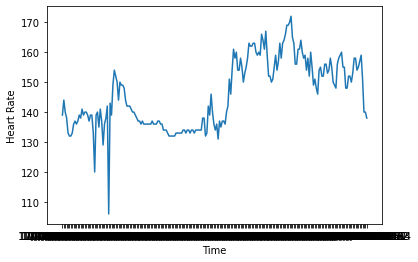

In [ ]:


x = df['Timestamp (GMT)']  # create an array of 100 x values from 0 to 10
y = df['Lifetouch Heart Rate']              # calculate the corresponding y values as sine of x

plt.plot(x, y)              # plot the x-y pairs
plt.xlabel('Time')      # set the x-axis label
plt.ylabel('Heart Rate')      # set the y-axis label
plt.show()                  # display the plot


In [ ]:
# check stationarity of the series
def check_stationarity(series):
  statistic, p_value, n_lags, critical_values = sm.tsa.stattools.kpss(series)
  print(f'p value: {p_value}')
  print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary \n')

 A time series is said to be stationary if its statistical properties, such as mean and variance, do not change over time. Non-stationary time series can exhibit trends, seasonal effects, and cyclic behavior, which can make it difficult to model and make accurate predictions.

In [ ]:
check_stationarity(df['Lifetouch Heart Rate'])


p value: 0.01
Result: The series is not stationary 



/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [ ]:
#add new column 'Log-Sales' with log transformed values
df1=df[['Timestamp (GMT)','Lifetouch Heart Rate']].copy()

In [ ]:
df1['Timestamp (GMT)'] = pd.to_datetime(df1['Timestamp (GMT)'])

In [ ]:
df1

,Timestamp (GMT),Lifetouch Heart Rate
0,2015-08-17 15:09:00,139
1,2015-08-17 15:10:00,144
2,2015-08-17 15:11:00,140
3,2015-08-17 15:12:00,138
4,2015-08-17 15:13:00,133
...,...,...
221,2015-08-17 18:50:00,159
222,2015-08-17 18:51:00,151
223,2015-08-17 18:52:00,140
224,2015-08-17 18:53:00,140


In [ ]:
df1.set_index('Timestamp (GMT)', inplace=True)


In [ ]:
from pmdarima import auto_arima



# Fit an ARIMA model to the dataset
model = auto_arima(df1['Lifetouch Heart Rate'], seasonal=True, suppress_warnings=True, stepwise=True)

# Print the optimal order of p, d, q
print(model.order)
model.summary()

(0, 1, 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  218
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -649.163
Date:                Thu, 16 Feb 2023   AIC                           1302.325
Time:                        05:58:00   BIC                           1309.085
Sample:                             0   HQIC                          1305.056
                                - 218                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4090      0.032    -12.976      0.000      -0.471      -0.347
sigma2        23.2044      0.955     24.296      0.000      21.332      25.076
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1528.16
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.48   Skew:                            -1.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#Model_1 ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model_1 = ARIMA(df1['Lifetouch Heart Rate'], order=(0, 1, 1))
model_First = model_1.fit()



/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model_1 = ARIMA(df1[:218], order=(0, 1, 1))
model_First = model_1.fit()
print(model_First.summary())

                                SARIMAX Results                                 
Dep. Variable:     Lifetouch Heart Rate   No. Observations:                  218
Model:                   ARIMA(0, 1, 1)   Log Likelihood                -649.163
Date:                  Thu, 16 Feb 2023   AIC                           1302.325
Time:                          05:58:00   BIC                           1309.085
Sample:                               0   HQIC                          1305.056
                                  - 218                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4090      0.032    -12.976      0.000      -0.471      -0.347
sigma2        23.2044      0.955     24.296      0.000      21.332      25.076
Ljung-Box (L1) (Q):                 

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In this case, based on the low AIC, BIC and HQIC values and the low P-values for the Ljung-Box and Jarque-Bera tests, the ARIMA(0,1,1) model appears to be a good fit for the data. However, it's always recommended to check the residuals and other diagnostics plots to make sure the model is well-specified.

In [ ]:
model_1 = ARIMA(df1, order=(0, 1, 1))

model= model_1.fit()

# Predict the next quarter of 1961
predictions= model.predict(start=len(df1), end=len(df1)+20)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
predictions

218    139.763077
219    139.763077
220    139.763077
221    139.763077
222    139.763077
223    139.763077
224    139.763077
225    139.763077
226    139.763077
227    139.763077
228    139.763077
229    139.763077
230    139.763077
231    139.763077
232    139.763077
233    139.763077
234    139.763077
235    139.763077
236    139.763077
237    139.763077
238    139.763077
Name: predicted_mean, dtype: float64

In [ ]:
print(model.summary())
residuals = model.resid



                                SARIMAX Results                                 
Dep. Variable:     Lifetouch Heart Rate   No. Observations:                  218
Model:                   ARIMA(0, 1, 1)   Log Likelihood                -649.163
Date:                  Thu, 16 Feb 2023   AIC                           1302.325
Time:                          05:58:00   BIC                           1309.085
Sample:                               0   HQIC                          1305.056
                                  - 218                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4090      0.032    -12.976      0.000      -0.471      -0.347
sigma2        23.2044      0.955     24.296      0.000      21.332      25.076
Ljung-Box (L1) (Q):                 

In [ ]:
residuals

Timestamp (GMT)
2015-08-17 15:09:00    139.000000
2015-08-17 15:10:00      5.001319
2015-08-17 15:11:00     -2.247455
2015-08-17 15:12:00     -2.897783
2015-08-17 15:13:00     -6.180701
                          ...    
2015-08-17 18:50:00      2.779995
2015-08-17 18:51:00     -6.862853
2015-08-17 18:52:00    -13.807226
2015-08-17 18:53:00     -5.647797
2015-08-17 18:54:00     -4.310211
Length: 218, dtype: float64

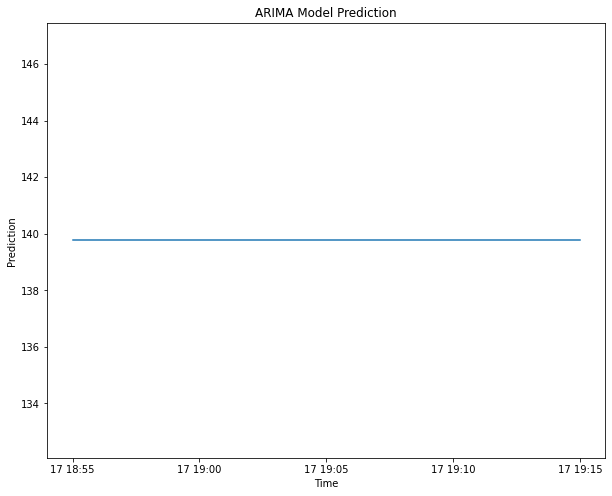

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))

next_minutes= pd.date_range(start='2015-08-17 18:55:00', periods=21, freq='T')
predictions.index = next_minutes
# Plot the predictions
plt.plot(predictions)

plt.xlabel('Time')
plt.ylabel('Prediction')
plt.title('ARIMA Model Prediction')
plt.show()

#Model_1a ARIMA Order (1,0,1)

In [ ]:
df1.info# Fit the ARMA model
model_11 = ARIMA(df1, order=(1, 0, 1))

model1= model_11.fit()

# Predict the next quarter of 1961
predictions_1 = model1.predict(start=len(df1), end=len(df1)+20)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
predictions_1

218    139.866455
219    140.062151
220    140.250067
221    140.430511
222    140.603782
223    140.770163
224    140.929929
225    141.083343
226    141.230657
227    141.372115
228    141.507948
229    141.638381
230    141.763627
231    141.883895
232    141.999380
233    142.110274
234    142.216759
235    142.319010
236    142.417196
237    142.511478
238    142.602012
Name: predicted_mean, dtype: float64

In [ ]:
print(model1.summary())
residuals = model1.resid


                                SARIMAX Results                                 
Dep. Variable:     Lifetouch Heart Rate   No. Observations:                  218
Model:                   ARIMA(1, 0, 1)   Log Likelihood                -650.654
Date:                  Thu, 16 Feb 2023   AIC                           1309.308
Time:                          05:58:01   BIC                           1322.846
Sample:                               0   HQIC                          1314.776
                                  - 218                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        144.7886      5.450     26.568      0.000     134.107     155.470
ar.L1          0.9602      0.022     43.376      0.000       0.917       1.004
ma.L1         -0.3823      0.045    

IN this model (1,0,1) AIC and BIC values are relatively high, which suggests that there may be other models that better explain the data.

p,d,q=0,1,1 is the best 

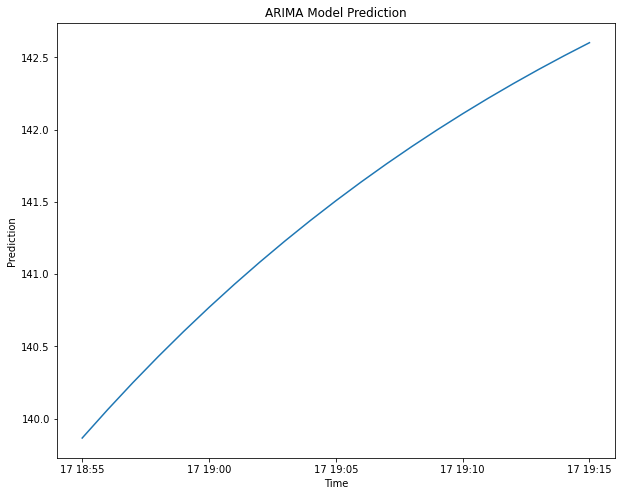

In [ ]:
plt.figure(figsize=(10, 8))

next_minutes= pd.date_range(start='2015-08-17 18:55:00', periods=21, freq='T')
predictions_1.index = next_minutes
# Plot the predictions
plt.plot(predictions_1)

plt.xlabel('Time')
plt.ylabel('Prediction')
plt.title('ARIMA Model Prediction')
plt.show()

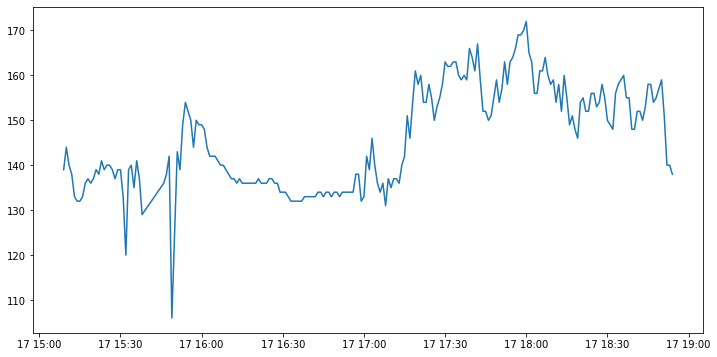

In [ ]:

# plot time series
plt.figure(figsize=(12, 6))
plt.plot(df1["Lifetouch Heart Rate"])
plt.show()

In [ ]:
# Assuming the target variable is in a DataFrame column called 'target'
target_range = df1['Lifetouch Heart Rate'].describe()[['min', 'max']]

print(target_range)

min    106.0
max    172.0
Name: Lifetouch Heart Rate, dtype: float64


In [ ]:
train_data=df1['2015-08-17 15:09:00':]
preds= model.predict(start=pd.to_datetime('2015-08-17 15:09:00'), dynamic=False)

In [ ]:
print(f'Mean Squared Error: {(mean_squared_error(train_data, preds), 2)}')
#order 0,1,1

Mean Squared Error: (111.74370458325171, 2)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
Arima_mse=mean_squared_error(train_data, preds)
print("Mean Squared Error",Arima_mse)
Arima_mae = mean_absolute_error(train_data, preds)
print("Mean Absolute Error: ", Arima_mae)

# calculate the R-squared score
Arima_r2 = r2_score(train_data, preds)
print("R-squared: ", Arima_r2)

Mean Squared Error 111.74370458325171
Mean Absolute Error:  3.6909368129825477
R-squared:  0.12587053707988127


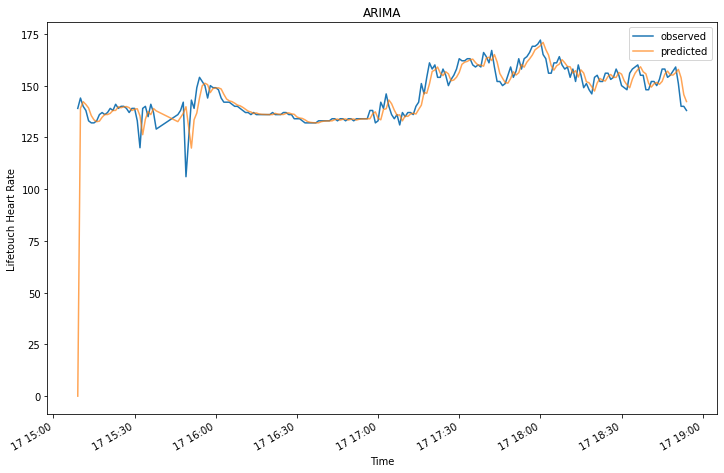

In [ ]:
# plot observations and predictions
ax = df1['2015-08-17 15:09:00':]['Lifetouch Heart Rate'].plot(label='observed', figsize=(12, 8))
preds.plot(ax=ax, label='predicted', alpha=.7)

ax.set_xlabel('Time')
ax.set_ylabel('Lifetouch Heart Rate')
plt.title("ARIMA")
plt.legend()

plt.show()

In [ ]:
preds_a= model1.predict(start=pd.to_datetime('2015-08-17 15:09:00'), dynamic=False)
#order 1,0,1
Arima_a_mse = mean_squared_error(train_data, preds_a)
print("Mean squared Error: ", Arima_a_mse)

#print(f'Mean Squared Error: {(mean_squared_error(train_data, preds_a), 2)}')
Arima_a_mae = mean_absolute_error(train_data, preds_a)
print("Mean Absolute Error: ", Arima_a_mae)

# calculate the R-squared score
Arima_a_r2 = r2_score(train_data, preds_a)
print("R-squared: ", Arima_a_r2)


Mean squared Error:  22.85322164258651
Mean Absolute Error:  3.116447760864896
R-squared:  0.8212277422255543


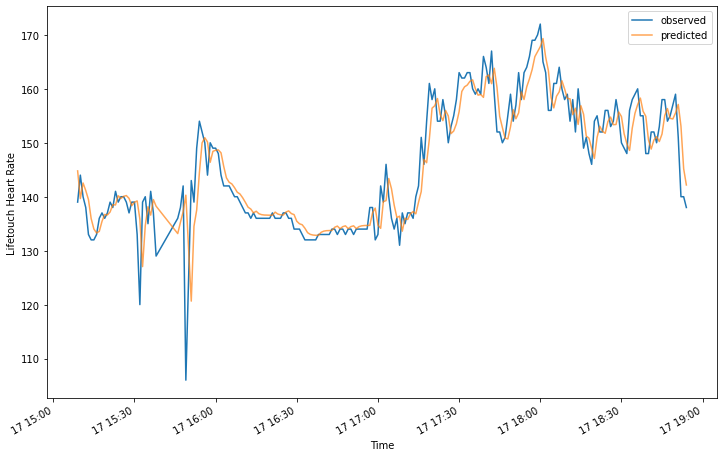

In [ ]:
# plot observations and predictions
ax = df1['2015-08-17 15:09:00':]['Lifetouch Heart Rate'].plot(label='observed', figsize=(12, 8))
preds_a.plot(ax=ax, label='predicted', alpha=.7)

ax.set_xlabel('Time')
ax.set_ylabel('Lifetouch Heart Rate')
plt.legend()

plt.show()

The mean squared error (MSE) is a measure of how well a model fits the data, where lower values indicate better fit. In this case, the MSE value of 22.853 indicates that the model has a relatively low error compared to the range of the target variable (106 to 172), so it may be considered a good fit. However, the interpretation of MSE depends on the specific context and goals of the modeling task, so it's important to also consider other metrics and factors.

#model_2


In [ ]:
model_2 = sm.tsa.statespace.SARIMAX(df1['Lifetouch Heart Rate'],
                                  order=(0, 1, 1),
                                  seasonal_order=(0, 0, 0, 12),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
# train model
mode_2 = model_2.fit()
print(mode_2.summary())

                                SARIMAX Results                                 
Dep. Variable:     Lifetouch Heart Rate   No. Observations:                  218
Model:                 SARIMAX(0, 1, 1)   Log Likelihood                -643.651
Date:                  Thu, 16 Feb 2023   AIC                           1291.302
Time:                          05:58:02   BIC                           1298.043
Sample:                               0   HQIC                          1294.026
                                  - 218                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4055      0.032    -12.819      0.000      -0.468      -0.344
sigma2        23.3230      0.965     24.171      0.000      21.432      25.214
Ljung-Box (L1) (Q):                 

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# make predictions
predictions_2 = mode_2.predict(start=len(df1), end=len(df1)+20,dynamic=False)
print(predictions_2)

218    139.730489
219    139.730489
220    139.730489
221    139.730489
222    139.730489
223    139.730489
224    139.730489
225    139.730489
226    139.730489
227    139.730489
228    139.730489
229    139.730489
230    139.730489
231    139.730489
232    139.730489
233    139.730489
234    139.730489
235    139.730489
236    139.730489
237    139.730489
238    139.730489
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
df1

,Lifetouch Heart Rate
Timestamp (GMT),
2015-08-17 15:09:00,139
2015-08-17 15:10:00,144
2015-08-17 15:11:00,140
2015-08-17 15:12:00,138
2015-08-17 15:13:00,133
...,...
2015-08-17 18:50:00,159
2015-08-17 18:51:00,151
2015-08-17 18:52:00,140


In [ ]:
#to find out mse value

In [ ]:
preds_2= mode_2.predict(start=pd.to_datetime('2015-08-17 15:09:00'), dynamic=False)
#print(f'Mean Squared Error: {(mean_squared_error(train_data, preds_2), 2)}')
Sarimax_mse = mean_squared_error(train_data, preds_2)
print("Mean squared Error: ", Sarimax_mse)

Sarimax_mae = mean_absolute_error(train_data, preds_2)
print("Mean Absolute Error: ", Sarimax_mae)

# calculate the R-squared score
Sarimax_r2 = r2_score(train_data, preds_2)
print("R-squared: ", Sarimax_r2)

Mean squared Error:  111.82062875702677
Mean Absolute Error:  3.699589292602344
R-squared:  0.12526878786315054


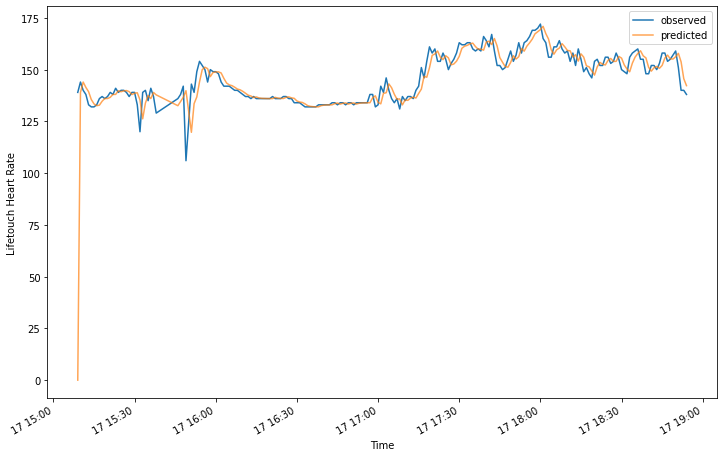

In [ ]:
# plot observations and predictions
ax = df1['2015-08-17 15:09:00':]['Lifetouch Heart Rate'].plot(label='observed', figsize=(12, 8))
preds_2.plot(ax=ax, label='predicted', alpha=.7)

ax.set_xlabel('Time')
ax.set_ylabel('Lifetouch Heart Rate')
plt.legend()

plt.show()

#model_3


In [ ]:
predictions_1 = model1.predict(start=len(df1), end=len(df1)+20)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
# single exponential smoothing
single_fit = SimpleExpSmoothing(df1["Lifetouch Heart Rate"]).fit()

# double exponential smoothing
double_fit = Holt(df1["Lifetouch Heart Rate"]).fit()

# triple exponential smoothing
tripple_fit = ExponentialSmoothing(df1["Lifetouch Heart Rate"], trend="mul",seasonal="mul", seasonal_periods=20).fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# future predictions
predictions_single_fit = single_fit.forecast(20)
predictions_double_fit = double_fit.forecast(20)
predictions_tripple_fit = tripple_fit.forecast(20)



/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
predictions_single_fit

218    139.783076
219    139.783076
220    139.783076
221    139.783076
222    139.783076
223    139.783076
224    139.783076
225    139.783076
226    139.783076
227    139.783076
228    139.783076
229    139.783076
230    139.783076
231    139.783076
232    139.783076
233    139.783076
234    139.783076
235    139.783076
236    139.783076
237    139.783076
dtype: float64

In [ ]:
predictions_double_fit

218    139.780584
219    139.779160
220    139.777735
221    139.776311
222    139.774887
223    139.773462
224    139.772038
225    139.770613
226    139.769189
227    139.767765
228    139.766340
229    139.764916
230    139.763491
231    139.762067
232    139.760643
233    139.759218
234    139.757794
235    139.756369
236    139.754945
237    139.753521
dtype: float64

In [ ]:
predictions_tripple_fit

218    140.044319
219    140.091807
220    139.633739
221    140.973178
222    140.150160
223    139.529062
224    140.867395
225    139.797353
226    138.258035
227    138.654237
228    138.880642
229    137.248056
230    138.099101
231    138.475176
232    139.639585
233    136.310522
234    138.108488
235    137.550339
236    138.001289
237    140.094550
dtype: float64

In [ ]:
print(single_fit.summary())

                        SimpleExpSmoothing Model Results                        
Dep. Variable:     Lifetouch Heart Rate   No. Observations:                  218
Model:               SimpleExpSmoothing   SSE                           5035.334
Optimized:                         True   AIC                            688.463
Trend:                             None   BIC                            695.232
Seasonal:                          None   AICC                           688.651
Seasonal Periods:                  None   Date:                 Thu, 16 Feb 2023
Box-Cox:                          False   Time:                         05:58:03
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.5888135                alpha                 True
initial_level              140.090

In [ ]:
print(double_fit.summary())

                               Holt Model Results                               
Dep. Variable:     Lifetouch Heart Rate   No. Observations:                  218
Model:                             Holt   SSE                           5035.333
Optimized:                         True   AIC                            692.463
Trend:                         Additive   BIC                            706.001
Seasonal:                          None   AICC                           692.861
Seasonal Periods:                  None   Date:                 Thu, 16 Feb 2023
Box-Cox:                          False   Time:                         05:58:03
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.5888212                alpha                 True
smoothing_trend           5.1334e-

In [ ]:
print(tripple_fit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:     Lifetouch Heart Rate   No. Observations:                  218
Model:             ExponentialSmoothing   SSE                           4728.206
Optimized:                         True   AIC                            718.744
Trend:                   Multiplicative   BIC                            799.972
Seasonal:                Multiplicative   AICC                           726.094
Seasonal Periods:                    20   Date:                 Thu, 16 Feb 2023
Box-Cox:                          False   Time:                         05:58:03
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.5994244                alpha                 True
smoothing_trend          

In [ ]:
preds_3a= single_fit.predict(start=pd.to_datetime('2015-08-17 15:09:00'))
#print(f'Mean Squared Error: {(mean_squared_error(train_data, preds_3a), 2)}')
Single_mse = mean_squared_error(train_data, preds_3a)
print("Mean squared Error: ", Single_mse)
Single_mae = mean_absolute_error(train_data, preds_3a)
print("Mean Absolute Error: ", Single_mae)

# calculate the R-squared score
Single_r2 = r2_score(train_data, preds_3a)
print("R-squared: ", Single_r2)

Mean squared Error:  23.097860243141287
Mean Absolute Error:  3.0572777863218294
R-squared:  0.8193140253919303


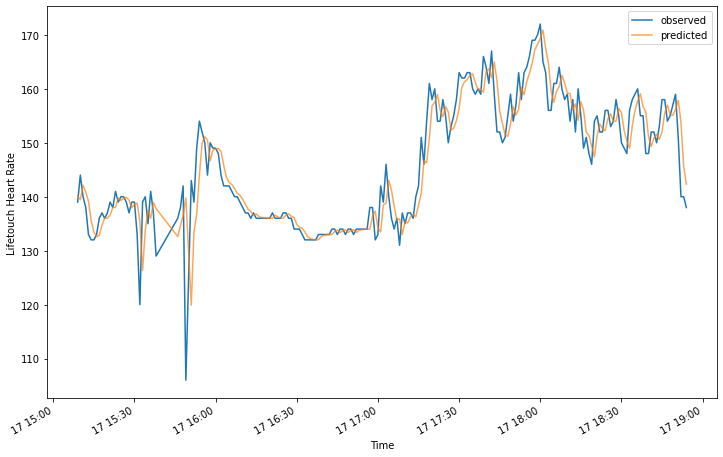

In [ ]:
# plot observations and predictions
ax = df1['2015-08-17 15:09:00':]['Lifetouch Heart Rate'].plot(label='observed', figsize=(12, 8))
preds_3a.plot(ax=ax, label='predicted', alpha=.7)

ax.set_xlabel('Time')
ax.set_ylabel('Lifetouch Heart Rate')
plt.legend()

plt.show()

In [ ]:
preds_3b= double_fit.predict(start=pd.to_datetime('2015-08-17 15:09:00'))
#print(f'Mean Squared Error: {(mean_squared_error(train_data, preds_3b), 2)}')
Double_mse = mean_squared_error(train_data, preds_3b)
print("Mean squared Error: ", Single_mse)
Double_mae = mean_absolute_error(train_data, preds_3b)
print("Mean Absolute Error: ", Single_mae)

# calculate the R-squared score
Double_r2 = r2_score(train_data, preds_3b)
print("R-squared: ", Single_r2)



Mean squared Error:  23.097860243141287
Mean Absolute Error:  3.0572777863218294
R-squared:  0.8193140253919303


In [ ]:
preds_3c= tripple_fit.predict(start=pd.to_datetime('2015-08-17 15:09:00'))
#print(f'Mean Squared Error: {(mean_squared_error(train_data, preds_3c), 2)}')
Tripple_mse = mean_squared_error(train_data, preds_3c)
print("Mean squared Error: ", Tripple_mse)
Tripple_mae = mean_absolute_error(train_data, preds_3c)
print("Mean Absolute Error: ", Tripple_mae)

# calculate the R-squared score
Tripple_r2 = r2_score(train_data, preds_3c)
print("R-squared: ", Tripple_r2)

Mean squared Error:  21.68901731946474
Mean Absolute Error:  3.058308972667161
R-squared:  0.8303348798803788


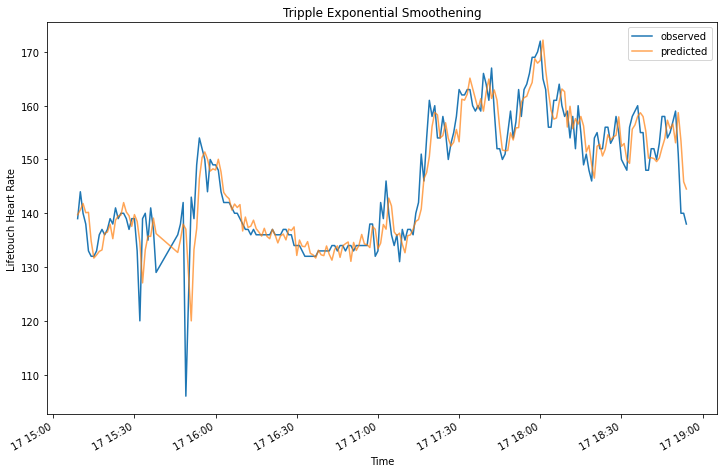

In [ ]:
# plot observations and predictions
ax = df1['2015-08-17 15:09:00':]['Lifetouch Heart Rate'].plot(label='observed', figsize=(12, 8))
preds_3c.plot(ax=ax, label='predicted', alpha=.7)

ax.set_xlabel('Time')
ax.set_ylabel('Lifetouch Heart Rate')
plt.title("Tripple Exponential Smoothening")
plt.legend()

plt.show()

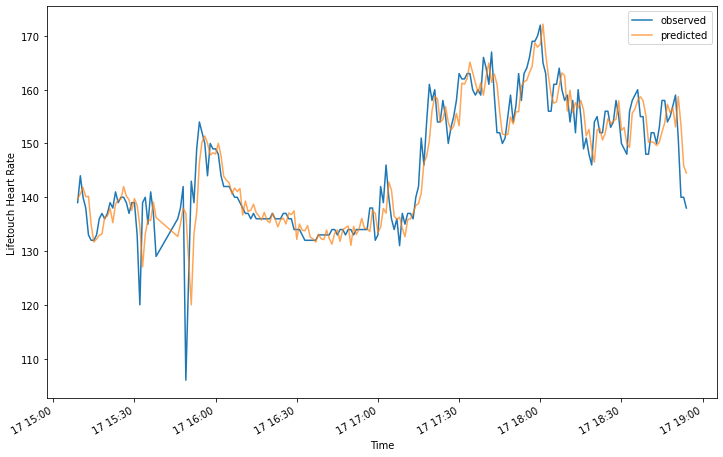

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

ax = df1['2015-08-17 15:09:00':]['Lifetouch Heart Rate'].plot(label='observed', figsize=(12, 8))
preds_3c.plot(ax=ax, label='predicted', alpha=.7)


ax.set_xlabel('Time')
ax.set_ylabel('Lifetouch Heart Rate')
plt.legend()

plt.show()

In [ ]:
predictions_single_fit

218    139.783076
219    139.783076
220    139.783076
221    139.783076
222    139.783076
223    139.783076
224    139.783076
225    139.783076
226    139.783076
227    139.783076
228    139.783076
229    139.783076
230    139.783076
231    139.783076
232    139.783076
233    139.783076
234    139.783076
235    139.783076
236    139.783076
237    139.783076
dtype: float64

A mean squared error of 21.69 and a mean absolute error of 3.06 indicate that the model's predictions are fairly accurate. An R-squared value of 0.83 suggests that the model explains 83% of the variability in the data, which is also good.

In [ ]:
print("{:<20} {:<20} {:<20} {:<20} {:<20} {:<20}".format("Model", "MSE", "MAE", "R-squared", "AIC", "BIC"))
print("{:<20} {:<20.2f} {:<20.2f} {:<20.2f} {:<20.2f} {:<20.2f}".format("ARIMA", Arima_mse, Arima_mae, Arima_r2,model_First.aic,model_First.bic))
print("{:<20} {:<20.2f} {:<20.2f} {:<20.2f} {:<20.2f} {:<20.2f}".format("ARIMA", Arima_a_mse, Arima_a_mae, Arima_a_r2,model1.aic,model1.bic))

print("{:<20} {:<20.2f} {:<20.2f} {:<20.2f} {:<20.2f} {:<20.2f}".format("SARIMAX", Sarimax_mse, Sarimax_mae, Sarimax_r2,mode_2.aic,mode_2.bic))
print("{:<20} {:<20.2f} {:<20.2f} {:<20.2f} {:<20.2f} {:<20.2f}".format("Exponential Smoothing", Single_mse, Single_mae, Single_r2,single_fit.aic,single_fit.bic))
print("{:<20} {:<20.2f} {:<20.2f} {:<20.2f} {:<20.2f} {:<20.2f}".format("Exponential Smoothing", Double_mse, Double_mae, Double_r2,double_fit.aic,double_fit.bic))
print("{:<20} {:<20.2f} {:<20.2f} {:<20.2f} {:<20.2f} {:<20.2f}".format("Exponential Smoothing", Tripple_mse, Tripple_mae, Tripple_r2,tripple_fit.aic,tripple_fit.bic))

Model                MSE                  MAE                  R-squared            AIC                  BIC                 
ARIMA                111.74               3.69                 0.13                 1302.33              1309.08             
ARIMA                22.85                3.12                 0.82                 1309.31              1322.85             
SARIMAX              111.82               3.70                 0.13                 1291.30              1298.04             
Exponential Smoothing 23.10                3.06                 0.82                 688.46               695.23              
Exponential Smoothing 23.10                3.06                 0.82                 692.46               706.00              
Exponential Smoothing 21.69                3.06                 0.83                 718.74               799.97              


In [ ]:
import json

# Suppose predicted_values is a list containing the predicted heart rate values

predictions_values=predictions_tripple_fit.tolist()
# Convert the list to a dictionary with a key called "predicted_values"
data = {"predicted_values": predictions_values}
# Open a new file called "predicted_values.json" in write mode
with open("submission.json", "w") as outfile:
    # Write the data to the file in JSON format
    json.dump(data, outfile)
